In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

C:\Users\prath\AppData\Local\Temp\ipykernel_17844\1858431299.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


* Get the stock data from Yahoo finance as a CSV for any company. 
* Drop all other columns (Volume, Year, Month and Day) and retain Open, High and Close - since I'm just predicting the close value for a day

In [15]:
df = pd.read_csv("historic_data/csv/TCS.NS.csv")

# Drop all rows where volume is 0
df = df[df["Volume"] != 0]

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

# Drop rows with NaN or infinite values
df = df.replace([np.inf, -np.inf], np.nan) # replace inf values with NaN
df = df.dropna() # drop rows with NaN values

# Convert the date column to ordinal values
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].apply(lambda date: date.toordinal())

# Split the data into features (X) and target (y)
X = df.drop("Adjusted Close", axis=1).sort_values(by="Date")
y = df["Adjusted Close"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

NameError: name 'train_test_split' is not defined

In [4]:
df.drop(df.columns[[0,3,6, 7,8,9]], axis=1, inplace=True)
df.head()

,Open,High,Close,Volume
Date,,,,
2002-08-12,38.724998,38.724998,40.000000,0.003970
2002-08-13,38.875000,39.750000,40.387501,0.003916
2002-08-14,35.724998,39.250000,39.250000,0.003646
2002-08-15,36.462502,36.462502,36.462502,0.003646
2002-08-16,35.750000,36.275002,38.000000,0.003638


<h2>Normalizing and removing the null data points</h2>

In [5]:
df['Open'] = df['Open']/100
df['High'] = df['High']/100
df['Volume'] = df['Volume']*100
df['Close'] = df['Close']/100
print(df)
nan_value_index = []
High = df.High.isnull()
for i in range(0, len(High)):
    if High[i] == 1:
        nan_value_index.append(i)
        df['High'][i] = 0
Open = df.Open.isnull()
for i in range(0, len(Open)):
    if Open[i] == 1:
        nan_value_index.append(i)
        df['Open'][i] = 0
Volume = df.Volume.isnull()
for i in range(0, len(Volume)):
    if Volume[i] == 1:
        nan_value_index.append(i)
        df['Volume'][i] = 0
Close = df.Close.isnull()
for i in range(0, len(Close)):
    if Close[i] == 1:
        nan_value_index.append(i)
        df['Close'][i] = 0

                 Open       High      Close     Volume
Date                                                  
2002-08-12   0.387250   0.387250   0.400000   0.397000
2002-08-13   0.388750   0.397500   0.403875   0.391625
2002-08-14   0.357250   0.392500   0.392500   0.364625
2002-08-15   0.364625   0.364625   0.364625   0.364625
2002-08-16   0.357500   0.362750   0.380000   0.363750
...               ...        ...        ...        ...
2023-04-24  31.261499  31.511001  31.809500  31.748000
2023-04-25  31.475000  31.830000  31.912000  31.760000
2023-04-26  31.810000  31.810000  32.083999  31.981499
2023-04-27  31.706499  31.850000  31.992000  31.879500
2023-04-28  31.962500  32.003999  32.272500  32.192500

[5154 rows x 4 columns]


In [6]:
X = df[['High','Open', 'Volume']]
Y = df[['Close']]
factor = 0.80
length = X.shape[0]
total_for_train = int(length*factor)
X_train = X[:total_for_train]
Y_train = Y[:total_for_train]
X_test = X[total_for_train:]
Y_test = Y[total_for_train:]

In [7]:
print("X_train", X_train.shape)
print("y_train", Y_train.shape)
print("X_test", X_test.shape)
print("y_test", Y_test.shape)

X_train (4123, 3)
y_train (4123, 1)
X_test (1031, 3)
y_test (1031, 1)


<h2>Compiling and training the neural network model</h2>

In [8]:
classifier = Sequential()
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 3))
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = [])
classifier.fit(X_train, Y_train, batch_size = 128, epochs = 50, validation_split=0.05)

Epoch 1/50
31/31 [==============================] - 1s 13ms/step - loss: 55.1196 - val_loss: 375.9804
Epoch 2/50
31/31 [==============================] - 0s 6ms/step - loss: 53.8152 - val_loss: 362.7650
Epoch 3/50
31/31 [==============================] - 0s 5ms/step - loss: 50.2677 - val_loss: 327.0996
Epoch 4/50
31/31 [==============================] - 0s 5ms/step - loss: 42.5787 - val_loss: 258.6749
Epoch 5/50
31/31 [==============================] - 0s 4ms/step - loss: 30.1944 - val_loss: 161.7366
Epoch 6/50
31/31 [==============================] - 0s 3ms/step - loss: 15.7627 - val_loss: 67.0791
Epoch 7/50
31/31 [==============================] - 0s 4ms/step - loss: 4.8301 - val_loss: 14.4947
Epoch 8/50
31/31 [==============================] - 0s 4ms/step - loss: 0.6975 - val_loss: 1.5000
Epoch 9/50
31/31 [==============================] - 0s 5ms/step - loss: 0.1391 - val_loss: 0.3618
Epoch 10/50
31/31 [==============================] - 0s 7ms/step - loss: 0.1241 - val_loss: 0.3445


<h2>Predicted Values</h2>

In [9]:
predictions = classifier.predict(X_test)
print(predictions[:10])

33/33 [==============================] - 0s 2ms/step
[[19.609396]
 [20.098186]
 [20.508965]
 [20.167833]
 [20.009733]
 [20.004004]
 [20.0213  ]
 [20.169136]
 [20.29843 ]
 [20.262474]]


Execute the trained model

<h2>Calculating the error in the trained Neural Network model</h2>

In [10]:
trainScore = classifier.evaluate(X_train, Y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = classifier.evaluate(X_test, Y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.01 MSE (0.11 RMSE)
Test Score: 0.13 MSE (0.36 RMSE)


<h2>Predictions vs Real results</h2>

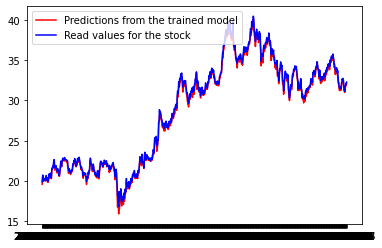

In [12]:
import matplotlib.pyplot as plt

plt.plot(predictions,color='red', label='Predictions from the trained model')
plt.plot(Y_test,color='blue', label='Read values for the stock')
plt.legend(loc='upper left')
plt.show()
